# CASE STUDY: FASHION CLASS CLASSIFICATION

### PROBLEM STATEMENT AND BUSINESS CASE

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.




#  Importing Data and Reshaping

In [204]:
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import random

In [205]:
fashion_train_df = pd.read_csv('./fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('./fashion-mnist_test.csv', sep = ',')

In [206]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
fashion_train_df.shape

(60000, 785)

In [208]:
fashion_test_df.shape

(10000, 785)

In [209]:
fashion_train_df['filename']=list(range(0,60000))
fashion_train_df['filename']=fashion_train_df['filename'].apply(lambda x: str(x)+'.png')

In [210]:
fashion_test_df['filename']=list(range(0,10000))
fashion_test_df['filename']=fashion_test_df['filename'].apply(lambda x: str(x)+'.png')

In [211]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,filename
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59995.png
59996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59996.png
59997,8,0,0,0,0,0,0,0,0,0,...,162,163,135,94,0,0,0,0,0,59997.png
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59998.png
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59999.png


### Entire set of images are in a single dataframe, to use generators later we will write the individual images to file in train/ and test/ folders

In [212]:
import cv2

In [ ]:
for row in fashion_train_df.values:
    img = np.array(row[1:-1]).reshape(28,28)
    img=img.astype('uint8')
    filename = 'train/'+row[-1]
    cv2.imwrite(filename, img)


In [ ]:
for row in fashion_test_df.values:
    img = np.array(row[1:-1]).reshape(28,28)
    img=img.astype('uint8')
    filename = 'test/'+row[-1]
    cv2.imwrite(filename, img)



# Re-Import data with required columns only

In [213]:
fashion_train_df = pd.read_csv('./fashion-mnist_train.csv',sep=',',usecols=['label'])
fashion_test_df = pd.read_csv('./fashion-mnist_test.csv', sep = ',',usecols=['label'])

In [214]:
fashion_train_df['filename']=list(range(0,60000))
fashion_train_df['filename']=fashion_train_df['filename'].apply(lambda x: str(x)+'.png')
fashion_test_df['filename']=list(range(0,10000))
fashion_test_df['filename']=fashion_test_df['filename'].apply(lambda x: str(x)+'.png')

In [215]:
fashion_test_df.head()

,label,filename
0,0,0.png
1,1,1.png
2,2,2.png
3,2,3.png
4,3,4.png


# Create Image Generator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [235]:
#### If required we can perform shearing/zooming and increase the input images. 
'''
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)
'''

'\ntrain_datagen = ImageDataGenerator(\n                                    rescale=1./255,\n                                    shear_range=0.2,\n                                    zoom_range=0.2,\n                                    horizontal_flip=True)\n\ntest_datagen = ImageDataGenerator(rescale=1./255)\n'

In [9]:
train_generator=train_datagen.flow_from_dataframe(
    dataframe=fashion_train_df, directory='train/', x_col='filename', y_col="label", color_mode = 'grayscale',class_mode="other", target_size=(28,28), batch_size=32)

Found 60000 images.


In [28]:
test_generator=test_datagen.flow_from_dataframe(
    dataframe=fashion_test_df, directory='test/', x_col='filename', y_col="label", color_mode = 'grayscale',class_mode="other", target_size=(28,28), batch_size=32)

Found 10000 images.


#### Loading images from the folder and using the dataframe to map the image to its corresponding classes

# Quick EDA

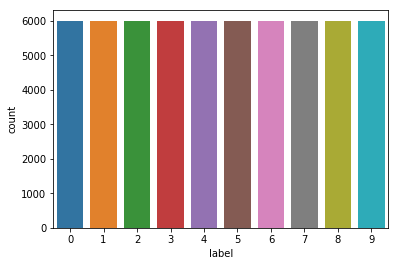

In [13]:
sns.countplot(fashion_train_df.label)

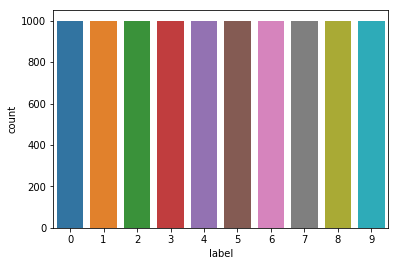

In [14]:
sns.countplot(fashion_test_df.label)

#### Both Train and Test data are balanced

# Plot Sample Images

In [24]:
class ImageViewer:
    def read_img(self,id, folder='train'):
        file=folder + '/' + str(id)
        im=cv2.imread(file)
        return im

    def draw_sample_images(self):
        ncols=4
        nrows = 10
        f, ax = plt.subplots(nrows=nrows,ncols=ncols, 
                             figsize=(4*ncols,5*nrows))
        i=-1
        captions=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
        for label in [0,1,2,3,4,5,6,7,8,9]:
            i=i+1
            samples = fashion_train_df[fashion_train_df['label']==label]['filename'].sample(ncols).values
            for j in range(0,ncols):
                file_id=samples[j]
                im=self.read_img(file_id)
                ax[i, j].imshow(im)
                ax[i, j].set_title(captions[i], fontsize=16)  
        plt.tight_layout()
        plt.show()

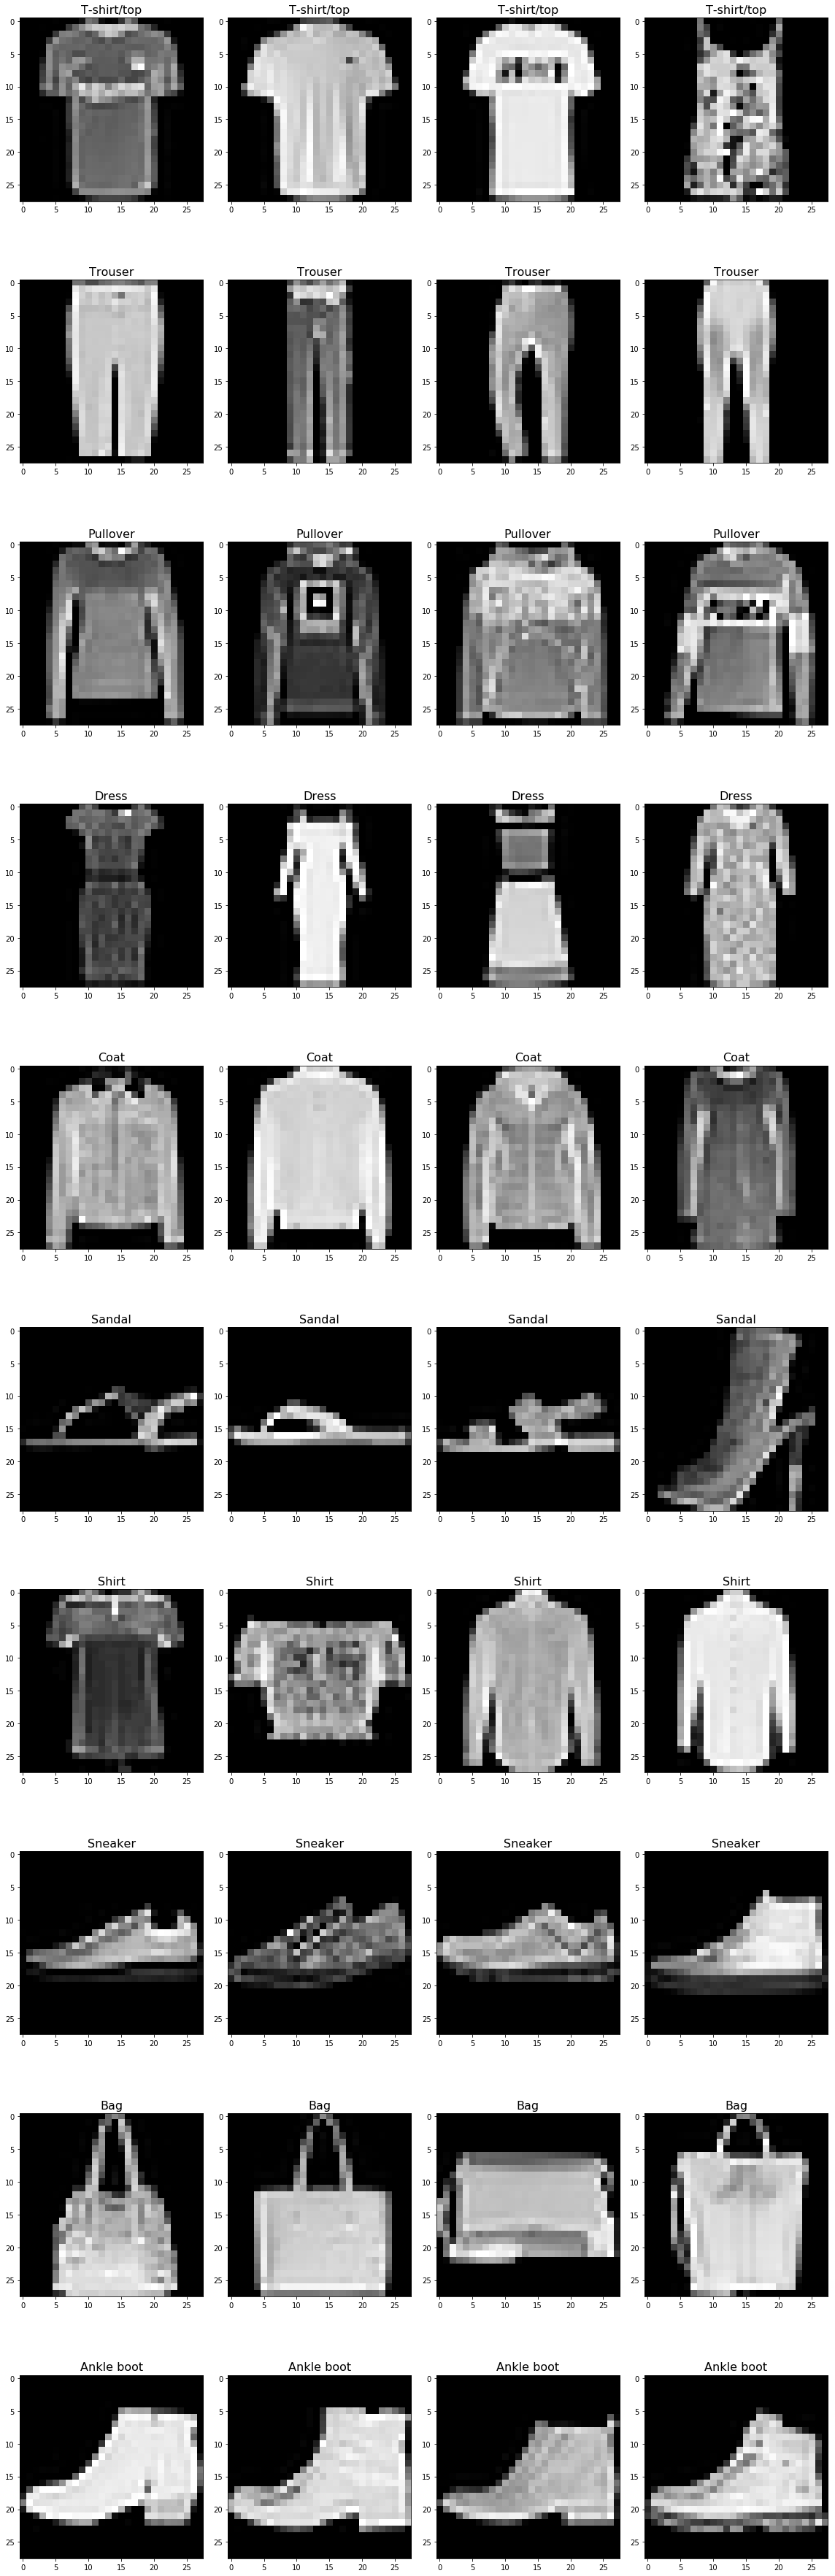

In [25]:
ImageViewer().draw_sample_images()

# Building Model

In [27]:
import plaidml.keras
plaidml.keras.install_backend()


# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam



# Initialising the CNN
classifier = Sequential()

#Step 1 - Convolution
classifier.add(Convolution2D(64,3,3,input_shape = (28,28,1),activation='relu'))

# Step 2 - Pooling & Dropout
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))

# Step 2b - Adding a second convolutional layer
#classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
#classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(output_dim = 32, activation='relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))


# Compiling the CNN
classifier.compile(optimizer=Adam(lr=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
/Users/bharath/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`


In [32]:
classifier.fit_generator(train_generator,
                        steps_per_epoch=100,
                        epochs=50,
                        validation_data=test_generator,
                        validation_steps=100)

Epoch 1/50
100/100 [==============================] - 5s 46ms/step - loss: 0.3670 - acc: 0.8731 - val_loss: 0.3395 - val_acc: 0.8813
Epoch 2/50
100/100 [==============================] - 4s 43ms/step - loss: 0.3666 - acc: 0.8787 - val_loss: 0.3427 - val_acc: 0.8762
Epoch 3/50
100/100 [==============================] - 4s 38ms/step - loss: 0.3376 - acc: 0.8819 - val_loss: 0.3360 - val_acc: 0.8900
Epoch 4/50
100/100 [==============================] - 4s 40ms/step - loss: 0.3479 - acc: 0.8741 - val_loss: 0.3416 - val_acc: 0.8822
Epoch 5/50
100/100 [==============================] - 4s 41ms/step - loss: 0.3398 - acc: 0.8787 - val_loss: 0.3626 - val_acc: 0.8719
Epoch 6/50
100/100 [==============================] - 4s 38ms/step - loss: 0.3366 - acc: 0.8816 - val_loss: 0.3799 - val_acc: 0.8650
Epoch 7/50
100/100 [==============================] - 4s 39ms/step - loss: 0.3238 - acc: 0.8856 - val_loss: 0.3205 - val_acc: 0.8922
Epoch 8/50
100/100 [==============================] - 4s 39ms/step - 

#### We see a 90% accuracy. Lets evaluate and plot the confusion matrix

# Evaluate the model

#### While using generator for evaluation/prediction its important to note the order in which they import the files and our y_test data should match this order. We create a new dataframe ordered_fashion_test_df for this.

#### Also importing the data should have shuffle = off

In [216]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [217]:
test_generator=test_datagen.flow_from_dataframe(dataframe=fashion_test_df, directory='test/', x_col='filename', y_col="label", color_mode = 'grayscale',class_mode="other", target_size=(28,28), shuffle=False,batch_size=100)

Found 10000 images.


In [218]:
test_generator.filenames[0:10] # Note the order here is different compared to fashion_test_df

['0.png',
 '1.png',
 '10.png',
 '100.png',
 '1000.png',
 '1001.png',
 '1002.png',
 '1003.png',
 '1004.png',
 '1005.png']

In [219]:
fashion_test_df.head()

,label,filename
0,0,0.png
1,1,1.png
2,2,2.png
3,2,3.png
4,3,4.png


In [220]:
ordered_fashion_test_df = pd.DataFrame()
ordered_fashion_test_df['filename']=test_generator.filenames

In [221]:
ordered_fashion_test_df.dtypes

filename    object
dtype: object

In [222]:
ordered_fashion_test_df = ordered_fashion_test_df.merge(fashion_test_df,on='filename',how='left')

In [236]:
ordered_fashion_test_df.head() # Correct label order which can be used for confusion matrix

,filename,label
0,0.png,0
1,1.png,1
2,10.png,3
3,100.png,9
4,1000.png,2


In [224]:
# get the predictions for the test data
predicted_classes = classifier.predict_generator(test_generator,steps=100,workers=1)

In [225]:
predicted_classes

array([[2.9982531e-01, 0.0000000e+00, 2.1725893e-05, ..., 0.0000000e+00,
        2.8640032e-05, 0.0000000e+00],
       [4.7385693e-06, 4.0444899e-01, 3.8743019e-07, ..., 0.0000000e+00,
        2.0861626e-07, 0.0000000e+00],
       [1.4472008e-04, 1.7881393e-07, 2.0235777e-04, ..., 0.0000000e+00,
        1.4603138e-06, 6.2584877e-07],
       ...,
       [1.1920929e-07, 0.0000000e+00, 1.7523766e-05, ..., 6.8545341e-06,
        9.5925224e-01, 0.0000000e+00],
       [2.6696920e-04, 2.9802322e-08, 2.3841858e-06, ..., 8.9406967e-08,
        9.8979205e-01, 1.0728836e-06],
       [8.0236793e-04, 9.9356949e-02, 2.7289987e-04, ..., 2.6822090e-07,
        1.4248490e-03, 2.2649765e-06]], dtype=float32)

In [226]:
predicted_classes = predicted_classes.argmax(axis=1)

In [227]:
(predicted_classes)

array([0, 1, 3, ..., 8, 8, 1])

In [228]:
ordered_fashion_test_df.shape

(10000, 2)

In [229]:
y_test = ordered_fashion_test_df.loc[:,'label'].values

In [230]:
y_test = y_test.astype(int)

In [231]:
y_test

array([0, 1, 3, ..., 8, 8, 1])

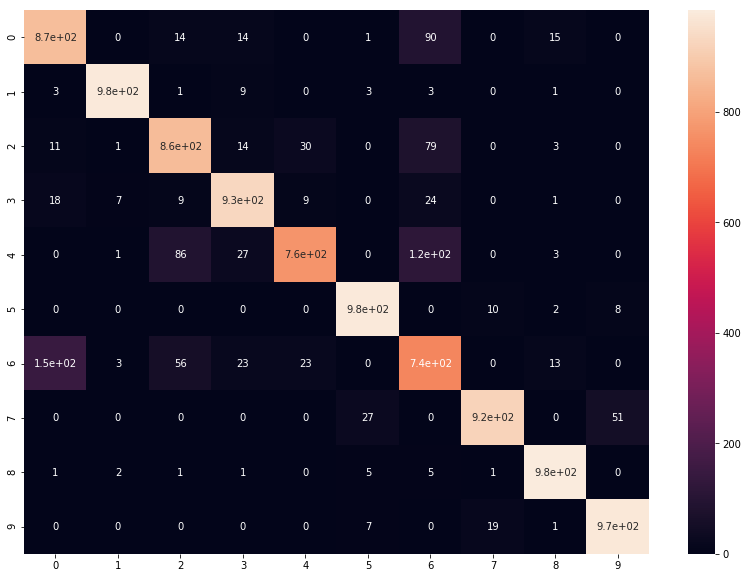

In [232]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)

In [233]:
evaluation = classifier.evaluate_generator(test_generator,steps=100)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

Test Accuracy : 0.900


# Summary

#### 1. Accuracy is around 90%. Mainly the wrong predictions are with labels - {0 => T-shirt/top} ,  {4 => Coat} & {6 => Shirt}
#### 2. We can increase accuracy by training the model on all 90,000 images , we did for only 100 (steps) *32 (batch size)  = 3,200 images and 50 epochs.
#### 3. Accuracy can be improved by adding one more layer of convolution+maxpooling+dropout 
#### 4. Accuracy can be improved by performing shearing and zooming on the input images and increasing the number of input samples